## <h1><span style="color:brown"><center>Executive Summary</center></span></h1>
### Title: Data analysis on a merged dataset after cleaning



#### <span style="color:green">Objective:</span>

The primary goal of the Project is to merge and clean datasets related to energy indicators, GDP, and journal contributions in the field of Energy Engineering and Power Technology. The resulting dataset will be used to answer various questions and derive insights related to GDP, energy supply, renewable energy, and population estimates.

#### <span style="color:green">Insights:</span>

The study aims to investigate the association between energy and economic indicators using datasets: population forecasts, economic indicators, and energy supply.

The study performs computations, transformations, and analyses on the datasets to extract information of  various components, including GDP growth rate, energy consumption, share of renewable energy, contribution to scientific research, and population estimates.

The study provides a comprehensive understanding of the relationship between energy supply per capita and Citable Documents per capita by combining datasets and employing statistical techniques.

The insights derived from the analysis aim to shed light on the impacts of energy and economic factors on different countries and continents.

#### <span style="color:green">Datasets:</span>

Datasets imported:

1) Energy Indicators.xlsx
Source::-(http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls)

2) world_bank.csv
Source:(http://data.worldbank.org/indicator/NY.GDP.MKTP.CD).


3) scimagojr-3.xlsx
Source:(http://www.scimagojr.com/countryrank.php?category=2102)

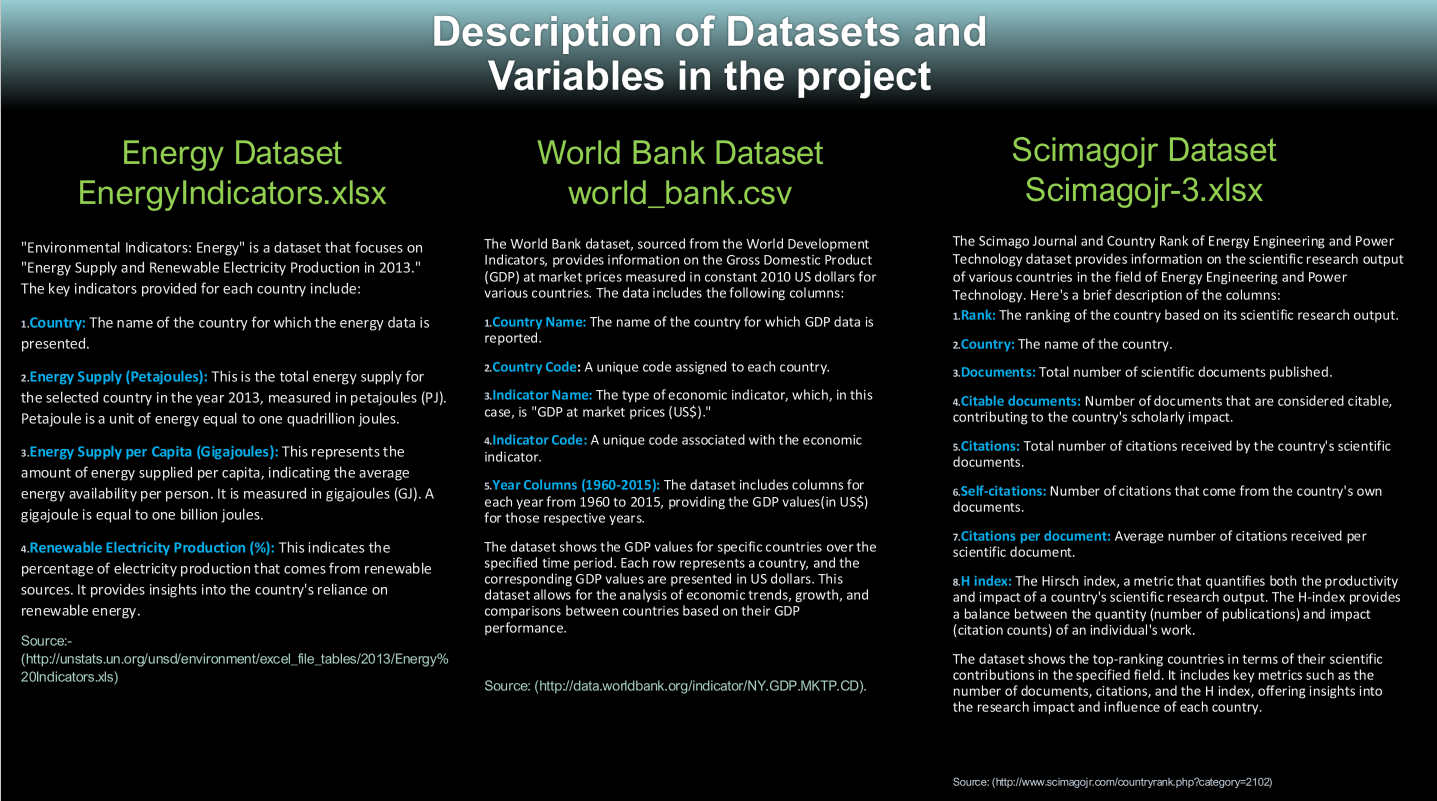

#### <span style="color:green">Methodology</span>:

Energy Data (Q1a-c): Loaded energy data from Energy Indicators.xls, removed header and footer, dropped unwanted columns, converted energy supply to gigajoules, and cleaned country names. Renamed specified countries, removed parentheses and digits from country names.

GDP Data (Q1d): Loaded GDP data from world_bank.csv, skipped the header, and renamed specified countries.

ScimEn Data (Q1e): Loaded Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from scimagojr-3.xlsx.

Merge Datasets (Q1f): Joined GDP, Energy, and ScimEn datasets into a new dataset using the intersection of country names and with the index as country name. Selected the last 10 years of GDP data and top 15 countries by Scimagojr Rank.

Analysis (Q2-Q12): Utilized the merged dataset to answer various questions related to GDP, energy supply, renewable energy, and population estimates.

#### <span style="color:green">Key Findings</span>:

China has highest average GDP ranked  at 1st position and Brazil at 15th position from Top 15 countries

The GDP change over the 10-year span for United Kingdom as the 6th largest average GDP was $246702696075.4, apprx $246 billions

The mean energy supply per capita of Top 15 countries is 157.6 Gigajoules

Top 2 countries with the maximum percentage renewable is Brazil and Canada . This indicates the percentage of electricity production that comes from renewable sources are highest in these countries which belongs to North America and South America Continent

The country with the highest Citation ratio is China. The country cites maximum its own work as compared to all other countries

As per the Population Estimates (using Energy Supply and Energy Supply per capita), the most populous country is China at 1st position, India at 2nd and United States at 3rd

As per Pearson Correlation Coefficient , high linear correlation exist between citable documents per capita and energy supply per capita and tend to move in the same direction. An increase in one tends to be associated with an increase in the other, and vice versa

A new column "HighRenew" indicates that the country with value 1, has a high percentage of renewable energy (% Renewable > Median_value), while a value of 0 indicates the opposite

## <h1><span style="color:brown"><center>Python Codes</center></span></h1>

#### Question1:

#### a) Read the energy data from the file Energy Indicators.xls, which is a list of indicators of [energy supply and renewable electricity production] from the [United Nations (http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a Data Frame with the variable name of energy. Keep in mind that this isan Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the data file. The first two columns are unnecessary, so you should get rid of them,and you should change the column labels so that the columns are:[&#39;Country&#39;, &#39;Energy Supply&#39;, &#39;Energy Supply per Capita&#39;, &#39;% Renewable’]
 
#### b) Convert variable Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with &quot;...&quot;) make sure this is reflected as NA values.
 
#### c) Rename the following list of countries.&quot;Republic of Korea&quot; to &quot;South Korea&quot;,&quot;United States of America&quot; to &quot;United States&quot;,&quot;United Kingdom of Great Britain and Northern Ireland&quot; to &quot;United Kingdom&quot;,&quot;China, Hong Kong Special Administrative Region&quot; to &quot;Hong Kong&quot;

#### There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `&#39;Bolivia (Plurinational State of)&#39;` should be `&#39;Bolivia&#39;`.
 
#### d) Next, load the GDP data from the file world_bank.csv, which is a csv containing countries&#39; GDP from 1960 to 2015 from [World Bank] (http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this Data Frame GDP. Make sure to skip the header, and rename the following list of countries: &quot;Korea, Rep.&quot; to &quot;South Korea&quot;, &quot;Iran, Islamic Rep.&quot; to &quot;Iran&quot;, &quot;Hong Kong SAR, China&quot; to &quot;Hong Kong&quot;```
 
#### e) Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology] (http://www.scimagojr.com/countryrank.php?category=2102) from the file scimagojr- 3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this Data Frame ScimEn.
 
#### f) Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr &#39;Rank&#39; (Rank 1 through 15). The index of this Data Frame should be the name of the country, and the columns should be [&#39;Rank&#39;, &#39;Documents&#39;, &#39;Citable documents&#39;, &#39;Citations&#39;, &#39;Self-citations&#39;, &#39;Citations per document&#39;, &#39;H index&#39;, &#39;Energy Supply&#39;, &#39;Energy Supply per Capita&#39;, &#39;% Renewable&#39;, &#39;2006&#39;, &#39;2007&#39;, &#39;2008&#39;, &#39;2009&#39;, &#39;2010&#39;, &#39;2011&#39;, &#39;2012&#39;, &#39;2013&#39;, &#39;2014&#39;, &#39;2015&#39;]. You should finally get a Data Frame with 20 columns and 15 entries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

######################################################################################################################

#1) Energy Dataset imported and cleaned in  Python (Q1a-Q1c)

def merged_datasets():
    
    '''This function cleans 3 raw datasets - Energy Indicators , world_bank and Scimagojr and merger it together to get\
    final result of 15 top countries as per the rank'''
    
    energy = pd.read_excel('Energy Indicators.xlsx')
    energy = energy[19:244]
    energy = energy.drop(energy.columns[[0, 1]], axis=1)# first and second columns dropped at axis = 1(column)
    energy.rename(columns={'Unnamed: 2': 'Country','Unnamed: 3':'Energy Supply','Unnamed: 4':'Energy Supply per Capita',\
                           'Unnamed: 5':'% Renewable'}, inplace=True)
    energy.replace('...', np.nan,inplace = True)
    energy['Energy Supply'] *= 1000000
    def rem_parenthesis_digit(data):
        
        '''This function takes an input data , converts it into string , removes any digits from the string then checks \
           if there is an opening parenthesis '('. If found, it truncates the string before the parenthesis. Finally, \
           it removes any leading or trailing whitespaces and returns the modified string.'''
        
        newData = ''.join([i for i in str(data) if not i.isdigit()])
        i = newData.find('(')
        if i > -1:
            newData = newData[:i]
        return newData.strip()
    energy['Country'] = energy['Country'].apply(rem_parenthesis_digit)
    dict1 = {"Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"}# dictionery created with old and new country name 
    energy.replace({"Country": dict1},inplace = True)# country name replaced with new names 
    
#2) world_bank dataset imported and cleaned (Q1d)

    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP.replace({"Korea, Rep.": "South Korea", 
                "Iran, Islamic Rep.": "Iran",
                "Hong Kong SAR, China": "Hong Kong"}, inplace=True)# old country names replaced with new names 
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)# "country Name" column renamed
    
#3) Scimagojr Dataset imported and cleaned (Q1e)
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
#4) Datasets joined- Energy indicator, world_bank and Scimagojr have been merged on country for further data analysis (Q1f)   

    df = pd.merge(pd.merge(energy, GDP, on='Country'), ScimEn, on='Country')
    df.set_index('Country',inplace=True)
    df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', \
             'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', \
             '2010', '2011', '2012', '2013', '2014', '2015']]
    df = (df.loc[df['Rank'].isin([i for i in range(1, 16)])])
    df.sort_values('Rank',inplace=True)
    return df

Top15_countries=merged_datasets()
Top15_countries.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


#### Q2) What are the top 15 countries for average GDP over the last 10 years? [NB: This function should return a Series named ‘avgGDP’ with 15 countries and their average GDP sorted in descending order.] 

Answer2 :

Average GDP of 15 countries in Descending order :

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


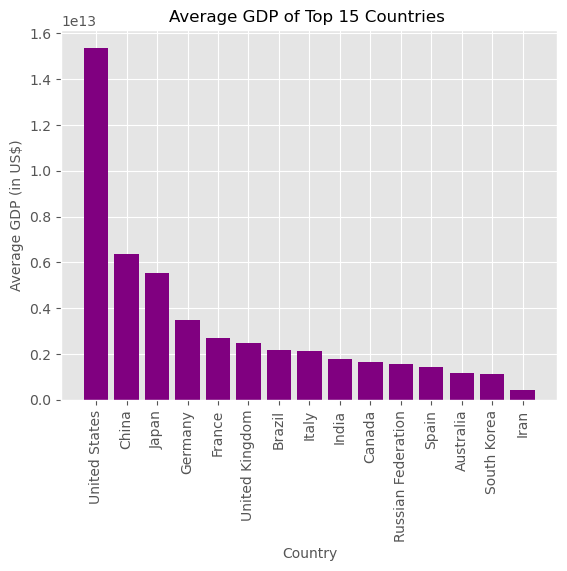

In [2]:
def Avg_GDP():
    
    '''The function calculates the average GDP for each country over the years 2006 to 2015, then sorts the results \
    in descending order based on the calculated average GDP'''
    
    rows = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    Top15_countries["avgGDP"] = merged_datasets()[rows].mean(axis=1)# calculated mean value 
    return Top15_countries.sort_values("avgGDP",ascending=False)["avgGDP"]# arranged in descending order

Avg_GDP()
print("Answer2 :\n")
print(f"Average GDP of 15 countries in Descending order :\n\n{Avg_GDP()}")

#A barchart displaying average GDP value of all countries  
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(Avg_GDP().index, Avg_GDP(),color='purple') 

ax.set_ylabel('Average GDP (in US$)',fontsize=10)
ax.set_xlabel('Country',fontsize=10)
ax.set_title('Average GDP of Top 15 Countries ',fontsize=12)
    
ax.set_xticks(range(len(Avg_GDP().index)))
ax.set_xticklabels(Avg_GDP().index, rotation=90)
plt.show()

#### Q3) By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP? [NB: This function should return a single number.]

The GDP change over the span of 10 years for United Kingdom is: 246702696075.4

Answer3: 246702696075.4


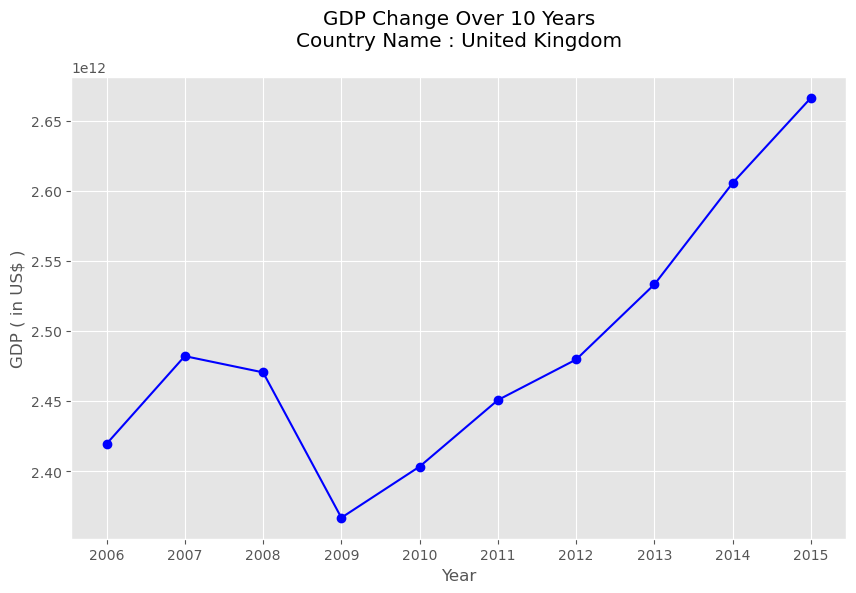

In [3]:
def change_over_10yrs():  
    '''The function calculates and prints the GDP change over a 10-year span for the country that is at the 6th position \
    after sorting based on average GDP'''
    
    Top15_countries["avgGDP"] = Avg_GDP()
    Top15_countries.sort_values("avgGDP", ascending=False, inplace=True)
    
    country_name = Top15_countries.index[5]
    
    # Extracted GDP values for the selected country over the 10-year span
    gdp_values = Top15_countries.loc[country_name, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                                    '2015']]
    
    # Created a line graph to visualize the changes over a period of time
    plt.figure(figsize=(10, 6))
    plt.plot(gdp_values, marker='o', linestyle='-',color="blue")
    
    # Added labels and title
    plt.title(f'GDP Change Over 10 Years\nCountry Name : {country_name}\n')
    plt.xlabel('Year')
    plt.ylabel('GDP ( in US$ )')
    
    # Calculated and returned the GDP change
    first = gdp_values['2006']
    last = gdp_values['2015']
    GDP_change = (last - first).round(2)
    
    print(f"The GDP change over the span of 10 years for {country_name} is: {GDP_change}")
    return GDP_change

Result3 = change_over_10yrs()
print("\nAnswer3:", Result3)
plt.show()

#### Q4) What is the mean energy supply per capita? [NB: This function should return a single number.]

In [4]:
def Average_ESPC():
    
    '''The function Average_ESPC() calculates the average value of the "Energy Supply per Capita" column in the dataframe '''
    
    Average_Value=Top15_countries["Energy Supply per Capita"].mean()# calculates average of the column
    return Average_Value
        
print("Answer 4\n","\nThe mean value of 'Energy Supply per Capita is' : ",Average_ESPC(),'Gigajoules')

Answer 4
 
The mean value of 'Energy Supply per Capita is' :  157.6 Gigajoules


#### Q5) Which country has the maximum % Renewable and what is the percentage? [NB: This function should return a tuple with the name of the country and the percentage.] 

Answer 5

('Brazil', 69.64803)
The country with the maximum % Renewable is Brazil with 69.64803 percent


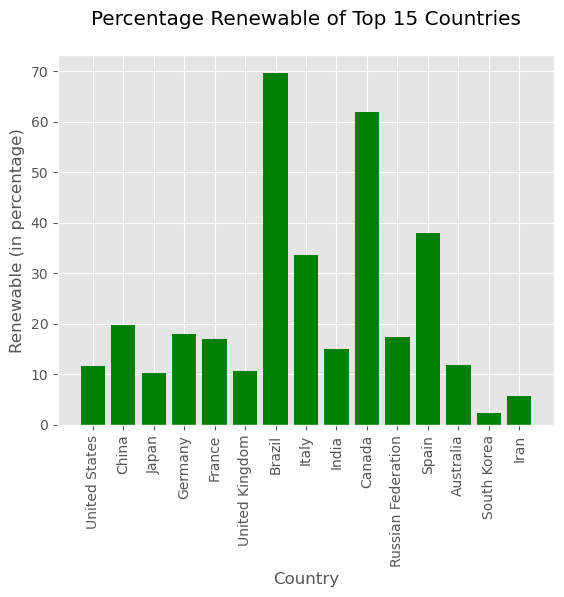

In [7]:
def Max_Renewable():
    
    '''The function finds and returns the country with the maximum "% Renewable" value along with the corresponding \
    maximum value'''
    
    maximum = Top15_countries['% Renewable'].idxmax(), Top15_countries['% Renewable'].max()# results in the index  and its corresponsing value 
    return maximum

Result5=Max_Renewable()
print(f"Answer 5\n\n{Result5}\nThe country with the maximum % Renewable is {Result5[0]} with {Result5[1]} percent")

#Barchat showing the % Renewable for Top 15 Countries 
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(Top15_countries['% Renewable'].index, Top15_countries['% Renewable'],color='green')

ax.set_ylabel('Renewable (in percentage)')
ax.set_xlabel('Country')
ax.set_title('Percentage Renewable of Top 15 Countries\n')
    
ax.set_xticks(range(len(Top15_countries['% Renewable'].index)))
ax.set_xticklabels(Top15_countries['% Renewable'].index, rotation=90)
plt.show()

#### Q6) Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and which country has the highest ratio?

Answer 6 

The country with the highest ratio is China and the highest ratio is 0.6893126179389422


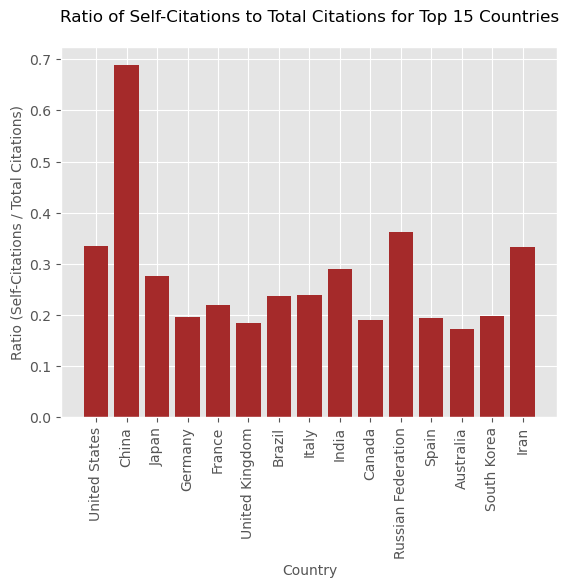

In [8]:
def Ratio_Self_TotalCitations():
    
    '''The function calculates the ratio of "Self-citations" to "Total Citations" for each country in the dataframe. \
    It then identifies and returns the country with the maximum ratio along with the corresponding maximum ratio value'''
    
    Top15_countries['Ratio']= Top15_countries['Self-citations']/Top15_countries['Citations']# calculated ration
    Max_Ratio=Top15_countries['Ratio'].idxmax(),Top15_countries['Ratio'].max()# results in the index value and its corresponsing maximum value 
    return Max_Ratio
    
Result6=Ratio_Self_TotalCitations()
print(f"Answer 6 \n\nThe country with the highest ratio is {Result6[0]} and the highest ratio is {Result6[1]}")

# Barchart showing the Ratio of Self Citations to total Citations of countries 
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(Top15_countries['Ratio'].index, Top15_countries['Ratio'], color='brown')

ax.set_ylabel('Ratio (Self-Citations / Total Citations)',fontsize=10)
ax.set_xlabel('Country',fontsize=10)
ax.set_title('Ratio of Self-Citations to Total Citations for Top 15 Countries\n',fontsize=12)
    
ax.set_xticks(range(len(Top15_countries['Ratio'].index)))
ax.set_xticklabels(Top15_countries['Ratio'].index, rotation=90)
plt.show()

#### Q7) Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate? [NB: This function should return a single string value.] 

Answer 7

The third most populous country according to estimate is 'United States'


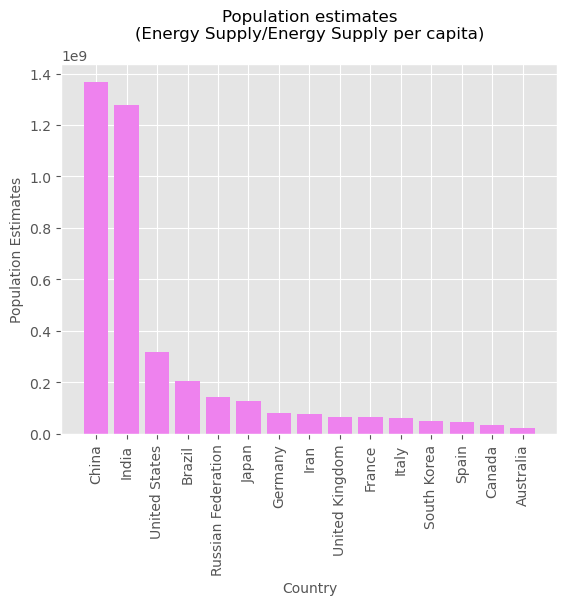

In [9]:
def Estimates_ES_ESPC():
    
    '''The function creates a new column to estimate the population using Energy Supply and Energy Supply per capita\
    and return the name of the third most populous country based on the calculated "Population" column.'''
    
    Top15_countries["Population"] = Top15_countries['Energy Supply'] /Top15_countries['Energy Supply per Capita']# estimates population
    final = Top15_countries.sort_values("Population", ascending=False)# Sorts value in Descending order
    return final.iloc[2].name # Display name of the index at index location 2 / 3rd position

Result7=Estimates_ES_ESPC()
print(f"Answer 7\n\nThe third most populous country according to estimate is '{Result7}'")

# Barchart showing the population estimates using Energy Supply and Energy Supply per capita
final = Top15_countries.sort_values("Population", ascending=False) 
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(final["Population"].index, final["Population"] , color='violet')

ax.set_ylabel('Population Estimates',fontsize=10)
ax.set_xlabel('Country',fontsize=10)
ax.set_title('Population estimates\n(Energy Supply/Energy Supply per capita)\n',fontsize=12)
    
ax.set_xticks(range(len(final["Population"].index)))
ax.set_xticklabels(final["Population"].index, rotation=90)
plt.show()   

#### Q8) Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the “.corr()” method, (Pearson's correlation). [NB: This function should return a single number.] Plot to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita.

Answer 8

Correlation: 0.7940010435442945

High Linear Correlation exists between Citable documents per capita and Energy Supply per capita and tend to move in the same
direction


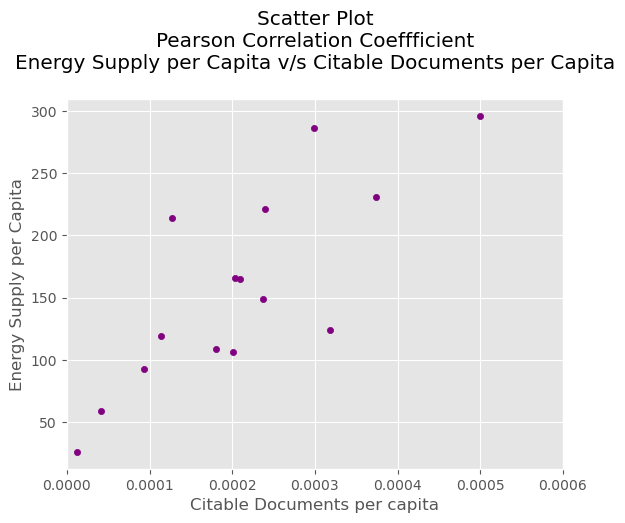

In [10]:
def Estimates_CD_PerPerson():
    
    '''This function helps to calculate the estimates of citable documents per person and correlation between 
    the number of citable documents per capita and the energy supply per capita'''
    
    Top15_countries["Population"] = Top15_countries['Energy Supply'] / Top15_countries['Energy Supply per Capita']
    Top15_countries['Citable Documents per capita'] = Top15_countries['Citable documents'] / Top15_countries["Population"]
    
    # calculated the correlation coefficient between 'Citable Documents per capita' and 'Energy Supply per capita'
    corr_value = Top15_countries['Citable Documents per capita'].corr(Top15_countries['Energy Supply per Capita'])
    return corr_value

def correlation_result(correlation):
    
    '''This function defines the strength of Association between Citable documents per capita and Energy Supply per capita'''
    
    if correlation != 0 and correlation < 0:
        pass
    elif correlation >= 0.5:
        print("\nHigh Linear Correlation exists between Citable documents per capita and Energy Supply per capita and tend to move in the same\ndirection")
    elif 0.3 <= correlation < 0.5:
        print("Medium Linear Correlation exists between Citable documents per capita and Energy Supply per capita")
    else:
        print("Lower Linear Correlation exists between Citable documents per capita and Energy Supply per capita")

result8 = Estimates_CD_PerPerson()
print("Answer 8\n\nCorrelation:", result8)
correlation_result(result8)

# Scatter Chart showing the relationship between Energy Supply per Capita v/s Citable Documents per Capita(Peasrson Correlation Coefficient)
Top15_countries.plot(x='Citable Documents per capita', y='Energy Supply per Capita', kind='scatter', color='purple', xlim=[0, 0.0006])
plt.title('Scatter Plot\nPearson Correlation Coeffficient\nEnergy Supply per Capita v/s Citable Documents per Capita\n')
plt.show()

#### Q9) Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median. [NB: This function should return a series named “HighRenew” whose index is the country name sorted in ascending order of rank.] 

In [11]:
def Segment_Renewable_values():
    
    '''The function segments countries into two categories based on whether their "% Renewable" values are higher than \
    or lower than the median '''
    
    Median_value=Top15_countries['% Renewable'].median()# calculated median value
    Top15_countries["HighRenew"]=Top15_countries.apply(lambda x: 1 if x["% Renewable"] > Median_value else 0, axis=1 )# Applied lambda function to assign values if the conditions are met
    Top15_countries.sort_values(by='Rank',ascending = True, inplace=True)# sorted all values as per "Rank" in ascending order
    return Top15_countries['HighRenew']

print("Answer 9\n")
Segment_Renewable_values()

Answer 9



Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

#### Q10) Use the following dictionary to group the Countries by Continent, then create a dataframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each continent. 

 #### ContinentDict  = 
                    {'China':'Asia',  
                  'United States':'North America',  
                  'Japan':'Asia',
                  'United Kingdom':'Europe',    
                  'Russian Federation':'Europe', 
                  'Canada':'North America',  
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia',  
                  'Italy':'Europe',  
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'} 

#### [NB: This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and with columns ['size', 'sum', 'mean', 'std'].] 

Answer 10

Dataframe dispalying the sample size (the number of countries in each continent),sum, mean and std deviation for the estimated population of each continent

              Population                                          
                    size           sum          mean           std
Continent                                                         
Asia                   5  2.898666e+09  5.797333e+08  6.790979e+08
Australia              1  2.331602e+07  2.331602e+07           NaN
Europe                 6  4.579297e+08  7.632161e+07  3.464767e+07
North America          2  3.528552e+08  1.764276e+08  1.996696e+08
South America          1  2.059153e+08  2.059153e+08           NaN


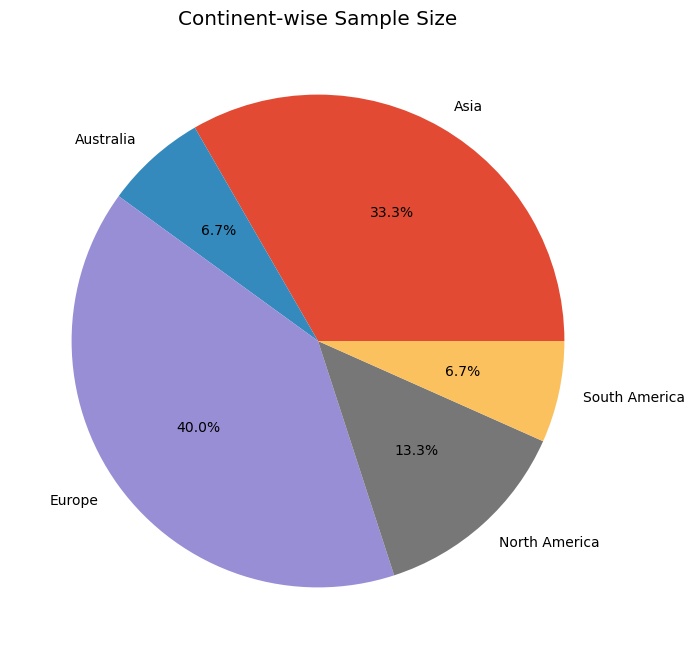

In [12]:
def Continents_df():
    
    '''The function creates a new dataframe Continent_groups that summarizes population statistics for each continent \
    based on the dictionary ContinentDict'''
    
    ContinentDict  = {'China':'Asia',  
                  'United States':'North America',  
                  'Japan':'Asia',
                  'United Kingdom':'Europe',    
                  'Russian Federation':'Europe', 
                  'Canada':'North America',  
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia',  
                  'Italy':'Europe',  
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}#A dictionary mapping each country to its respective continent

    Top15_countries['Population'] = Top15_countries['Energy Supply'] / Top15_countries['Energy Supply per Capita']# calculates population estimates
    Top15_countries['Continent'] = Top15_countries.index.map(ContinentDict)# created a new column named continent. map method is used to map index(country name) against the continents and assign the continent name to the new column 

    # Created Continent_groups DataFrame
    Continent_groups = Top15_countries.groupby('Continent').agg({'Population': ['size', 'sum', 'mean', 'std']})
    return Continent_groups

result10 = Continents_df()
print("Answer 10\n\nDataframe dispalying the sample size (the number of countries in each continent),sum, mean and std deviation for the estimated population of each continent\n")
print(result10)

# Plotting a pie chart showing the 'size' of the Continents
plt.figure(figsize=(8, 8))
plt.pie(result10['Population','size'], labels=result10.index, autopct='%.1f%%', startangle=0)
plt.title('Continent-wise Sample Size')
plt.show()

#### Q11) Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups? [NB: This function should return a Series with a MultiIndex of ‘Continent’, then the bins for ‘% Renewable’. Do not include groups with no countries.] 

Answer 11

 Renewable Energy Distribution into 5 bins and corresponding countries grouped in continents:



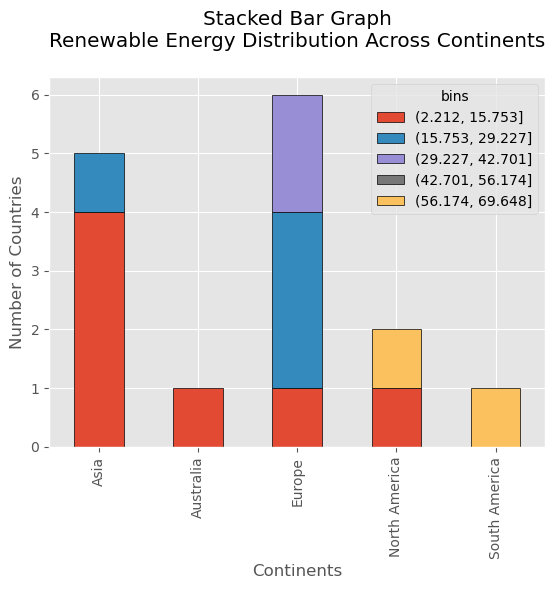

Country        bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [13]:
def Continent_bins():
    
    '''The function create bins based on the "% Renewable" column and then groups the data by continent and bins, \
    counting the number of countries in each continent and bin. Dropping out countries with 0 value '''
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15_countries["bins"] = pd.cut(Top15_countries["% Renewable"], 5)
    result11=Top15_countries.groupby([ContinentDict, Top15_countries['bins']]).size()
    result11 

    # Plotting Stacked Bar Chart of Bins by Continent
    result11_unstacked=result11.unstack()
    ax = result11_unstacked.plot(kind='bar', stacked=True, edgecolor='black')

    # Added labels and title
    plt.title('Stacked Bar Graph\nRenewable Energy Distribution Across Continents\n')
    plt.xlabel('Continents')
    plt.ylabel('Number of Countries')

    # Showing the plot
    plt.show()
    return (result11[result11 > 0])# Drop groups with no countries

print("Answer 11\n\n Renewable Energy Distribution into 5 bins and corresponding countries grouped in continents:\n")
Continent_bins()

#### Q12) Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.   e.g. 317615384.61538464 -> 317,615,384.61538464 <br>[NB: This function should return a Series PopEst whose index is the country name and whose values are the population estimate string.] 

In [14]:
def comma_separator():
    
    '''The function formats the population values in the "Population" column of the dataframe by adding commas as \
    thousands separators'''
    
    Top15_countries["Population"] = Top15_countries['Energy Supply'] /Top15_countries['Energy Supply per Capita']
    return Top15_countries["Population"].apply(lambda x: '{0:,}'.format(x))
    #formatting numbers with comma as thousands separator

print("Answer 12\n")
print(comma_separator())

Answer 12

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population, dtype: object


### <span style="color:green">Recommendations:</span>


1)Energy Efficiency Programs:The countries with higher population estimates should  implement energy efficiency programs to optimize energy consumption. This can help in sustaining the higher population without excessively increasing the demand for energy resources.

2)Positive correlation between Energy Supply per capita and Citable documents per capita can be valuable for countries seeking to enhance their global competitiveness in research, innovation, and sustainable energy development.

3)Research and Development: The countries with % Renewable value lower than median should allocate resources to research and development initiatives aimed at improving renewable energy technologies. This can involve collaboration with academic institutions, private sectors, and international organizations to foster innovation.

4)The continents with lower percentage of renewable energy , Asia could consider increasing investments in renewable energy projects and should diversify their renewable sources.
